#**Automated Feature Engineering**

So far we have considered **feature Engineering** and some of the techniques used in feature engineering such as [dealing with outliers](https://colab.research.google.com/drive/1sURhe2bewmTDPz58VqY-eERF5XQp83hT?usp=sharing),  [missing values](https://colab.research.google.com/drive/15PrD5UOxtE72Lg8Z-quxZQBdZ9qb2DXb?usp=sharing), [date and time](https://colab.research.google.com/drive/1Pe5Fkguh3aytjqxrtavp6zy-6km8pJ8V?usp=sharing), [feature transformation](https://colab.research.google.com/drive/1T5qRb3z9eeeuPx7CuWki4uz4sOGw3U8u?usp=sharing), [feature scaling](https://colab.research.google.com/drive/1AWf_4eREHMHSTKCi3EbS_7zQB8ItOQnN?usp=sharing), categorical encoding.

In this notebook, we will learn how to use Automated Featuring Tools to perform feature engineering.

##We will consider:

*   **FeatureSelector** 
*   **RFECV** 
*   **Featuretools** 
*   **AutoFeat**




#**PART 1**

##**FeatureSelector**

Feature selection involves the process of finding and selecting the most useful features in a dataset.

Unnecessary features hurt our model and we try as much as possible to get rid of them.

Feature selection is actually one of the tedious work to do for any data analyst or scientist.
Likely, ***FeatureSelector*** does most of the dirty work for us so we dont have to do it.

FeatureSelector contains most of the common feature selection methods such as:

1. Features with a high percentage of missing values
2. Features with a single unique value
3. Collinear (highly correlated) features
4. Features with low importance
5. Features with zero importance in a tree-based model



Let's see how it works below

In [ ]:
#  !pip install feature_selector

In [ ]:
#mport the libraries
from feature_selector import FeatureSelector

import pandas as pd

In [ ]:
df = pd.read_csv('/content/credit_example.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,247408,0,Cash loans,F,Y,N,2,108000.0,172512.0,13477.5,144000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-12665,-2719,-6816.0,-4365,7.0,1,1,0,1,0,0,Laborers,4.0,2,2,TUESDAY,16,0,0,0,0,0,0,...,0.1095,0.1323,0.0194,0.0729,reg oper account,block of flats,0.1484,"Stone, brick",No,1.0,1.0,1.0,1.0,-2622.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,153916,0,Revolving loans,F,Y,Y,2,135000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007274,-12748,-471,-747.0,-4880,17.0,1,1,0,1,0,0,Cooking staff,4.0,2,2,TUESDAY,10,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,229065,0,Cash loans,F,N,Y,0,112500.0,463500.0,20547.0,463500.0,Family,Pensioner,Secondary / secondary special,Widow,House / apartment,0.026392,-23441,365243,-14237.0,-4634,NaN,1,0,0,1,0,0,NaN,1.0,2,2,THURSDAY,11,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1285.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0
3,282013,0,Cash loans,F,N,Y,0,135000.0,549882.0,17739.0,459000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.019101,-22793,365243,-690.0,-4478,NaN,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,...,0.0445,0.0572,0.0233,0.0154,reg oper account,block of flats,0.0383,"Stone, brick",No,5.0,1.0,5.0,0.0,-177.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,142266,0,Cash loans,F,N,Y,0,90000.0,518562.0,20695.5,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.022625,-13829,-631,-4822.0,-1803,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,TUESDAY,12,0,0,0,0,0,0,...,NaN,0.0114,NaN,0.0000,NaN,block of flats,0.0088,Block,No,0.0,0.0,0.0,0.0,-718.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


datasets used in this tutorial

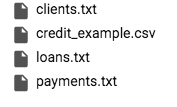

In [ ]:
train_labels = df['TARGET']
df = df.drop(columns = ['TARGET'])

In [ ]:
# Creating an Instance

# from feature_selector import FeatureSelector


# Features are in df and labels are in train_labels
fs = FeatureSelector(data = df, labels = train_labels)

##**Missing Values**

We can find any columns with a missing fraction greater than a specified threshold.

In [ ]:

#we will identify any column with a missing value greater than 50%

fs.identify_missing(missing_threshold=0.5)

44 features with greater than 0.50 missing values.



We can as well see which specific features are having missing values and their respective fractions

In [ ]:
missing_features = fs.ops['missing']
fs.missing_stats.head(10)

,missing_fraction
COMMONAREA_AVG,0.693835
COMMONAREA_MODE,0.693835
COMMONAREA_MEDI,0.693835
NONLIVINGAPARTMENTS_AVG,0.692546
NONLIVINGAPARTMENTS_MODE,0.692546
NONLIVINGAPARTMENTS_MEDI,0.692546
LIVINGAPARTMENTS_MEDI,0.683776
LIVINGAPARTMENTS_AVG,0.683776
LIVINGAPARTMENTS_MODE,0.683776
FONDKAPREMONT_MODE,0.683518


We can visualise these missing fractions

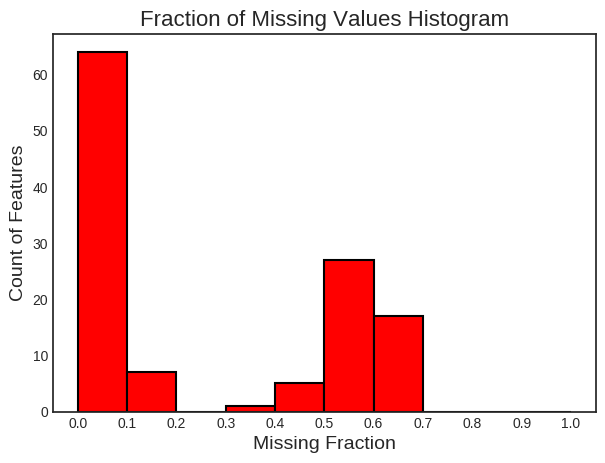

In [ ]:
fs.plot_missing()

##**Collinear (highly correlated) Features**

Let's identify features that are highly correated based on the Pearson correlation coefficient.

In [ ]:
fs.identify_collinear(correlation_threshold=0.90)

36 features with a correlation magnitude greater than 0.90.



In [ ]:
correlated_features = fs.ops['collinear']
correlated_features

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'YEARS_BUILD_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

<br>

Plot a **Heatmap** of the correlated features

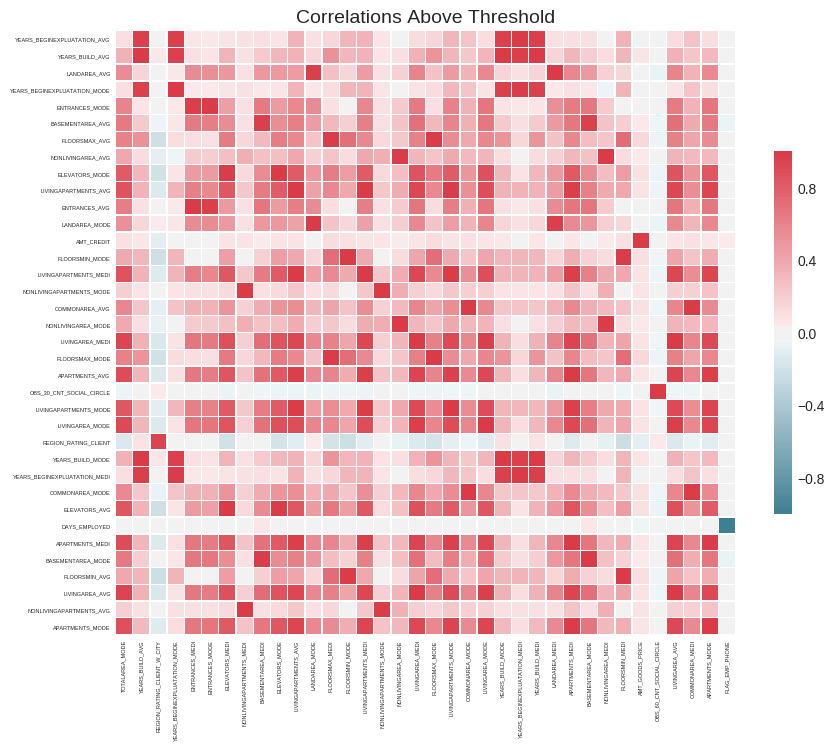

In [ ]:

fs.pot_collinear()

We can access the dataframe containing the correlation features. The *drop_feature* will be removed and for each feature that will be removed, there may be several correlations it has with the corr_feature that are above the correlation_threshold.

In [ ]:

fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,AMT_GOODS_PRICE,AMT_CREDIT,0.988085
1,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999889
2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.946839
3,YEARS_BUILD_AVG,YEARS_BEGINEXPLUATATION_AVG,0.969752
4,LIVINGAPARTMENTS_AVG,APARTMENTS_AVG,0.974329


##**Zero Importance Features**

The *identify_zero_importance()* function finds features that have zero importance according to a gradient boosting machine (GBM) learning model.

The parameters we pass in are as follows:
1. *task* : either “classification” or “regression” corresponding to our problem
2. *eval_metric*: metric to use for early stopping (not necessary if early stopping is disabled)
3. *n_iterations* : number of training runs to average the feature importances over
4. *early_stopping*: whether or not use early stopping for training the model

In [ ]:

fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's auc: 0.715191
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[146]	valid_0's auc: 0.711791
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[20]	valid_0's auc: 0.732143
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[83]	valid_0's auc: 0.698642
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[31]	valid_0's auc: 0.732978
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[66]	valid_0's auc: 0.739861
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[61]	valid_0's auc: 0.730312
Training until validation scores don't improve for 100 rounds.
Early stoppin

<br>

Featuretools will automatically one hot encoding the features. We can see these as stored in the ***data_all*** attribute which holds the original data plus the one-hot encoded features.

In [ ]:
fs.data_all.head(10)

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0.1095,0.1323,0.0194,0.0729,reg oper account,block of flats,0.1484,"Stone, brick",No,1.0,1.0,1.0,1.0,-2622.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1285.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0
3,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0.0445,0.0572,0.0233,0.0154,reg oper account,block of flats,0.0383,"Stone, brick",No,5.0,1.0,5.0,0.0,-177.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,NaN,0.0114,NaN,0.0000,NaN,block of flats,0.0088,Block,No,0.0,0.0,0.0,0.0,-718.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0.0684,0.0853,0.0000,0.0000,reg oper account,block of flats,0.0768,Panel,No,0.0,0.0,0.0,0.0,-2020.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,NaN,0.0605,NaN,NaN,reg oper account,block of flats,0.0551,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,Na

Let's see the list of featurees that are not important

In [ ]:

zero_importance_features = fs.ops['zero_importance']
zero_importance_features

['WALLSMATERIAL_MODE_Wooden',
 'ORGANIZATION_TYPE_Security',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Others',
 'ORGANIZATION_TYPE_Religion',
 'FLAG_CONT_MOBILE',
 'ORGANIZATION_TYPE_Realtor',
 'FLAG_DOCUMENT_2',
 'WALLSMATERIAL_MODE_Mixed',
 'FLAG_MOBIL',
 'ORGANIZATION_TYPE_Mobile',
 'ORGANIZATION_TYPE_Military',
 'ORGANIZATION_TYPE_Medicine',
 'ORGANIZATION_TYPE_Legal Services',
 'ORGANIZATION_TYPE_Kindergarten',
 'ORGANIZATION_TYPE_Insurance',
 'ORGANIZATION_TYPE_Security Ministries',
 'HOUSETYPE_MODE_block of flats',
 'HOUSETYPE_MODE_specific housing',
 'WALLSMATERIAL_MODE_Block',
 'FONDKAPREMONT_MODE_org spec account',
 'FONDKAPREMONT_MODE_not specified',
 'ORGANIZATION_TYPE_XNA',
 'ORGANIZATION_TYPE_University',
 'ORGANIZATION_TYPE_Transport: type 4',
 'ORGANIZATION_TYPE_Transport: type 3',
 'ORGANIZATION_TYPE_Transport: type 1',
 'ORGANIZATION_TYPE_Industry: type 8',
 'ORGANIZATION_TYPE_Trade: type 6',
 'ORGANIZATION_TYPE_Trade: type 5',
 'ORGANIZATION_TYPE_Trade:

##**Plot Feature Importances**

Let's plot those features that are important

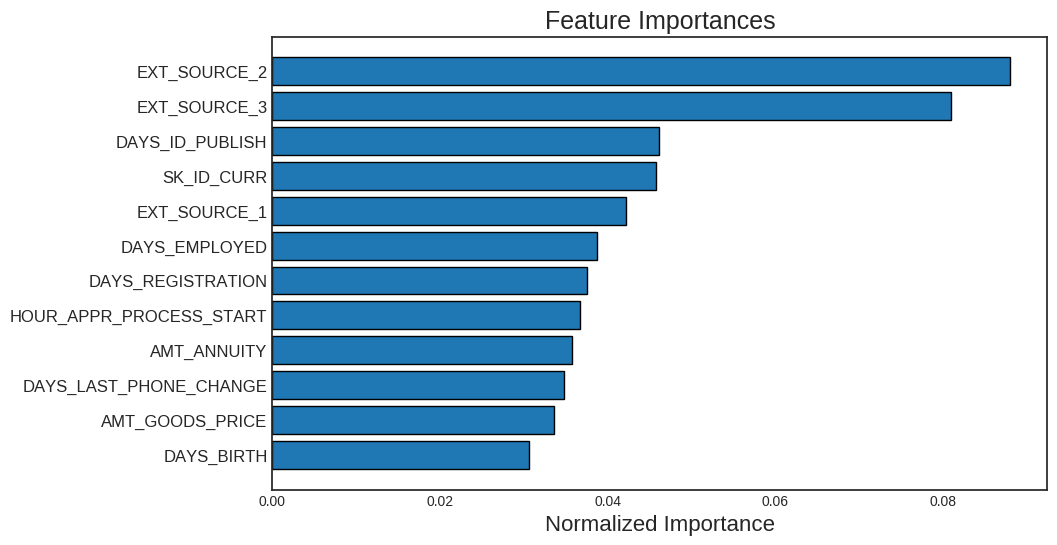

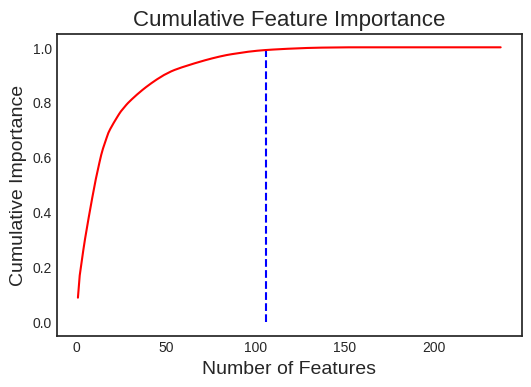

106 features required for 0.99 of cumulative importance


In [ ]:

fs.plot_feature_importances(threshold = 0.99, plot_n =12) 

we have the ***plot_n most important features*** which is plotted in terms of normalized importance where the total sums to 1. We also have the ***cumulative importance*** versus the number of features. The vertical line is drawn at threshold of the cumulative importance, in this case 99%.

<br>

We can also access all of the feature impotance in the ***feature_importances*** attribute.

In [ ]:

#let's see the 10 most important features

fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,EXT_SOURCE_2,174.9,0.088066,0.088066
1,EXT_SOURCE_3,160.7,0.080916,0.168983
2,DAYS_ID_PUBLISH,91.7,0.046173,0.215156
3,SK_ID_CURR,91.0,0.045821,0.260977
4,EXT_SOURCE_1,83.8,0.042195,0.303172
5,DAYS_EMPLOYED,76.9,0.038721,0.341893
6,DAYS_REGISTRATION,74.6,0.037563,0.379456
7,HOUR_APPR_PROCESS_START,73.0,0.036757,0.416213
8,AMT_ANNUITY,71.0,0.035750,0.451964
9,DAYS_LAST_PHONE_CHANGE,69.1,0.034794,0.486757


##**Low Importance Features**

We have seen the ***zero important*** features as well as the ***most important*** features. 

This *Low Importance Features* builds off the feature importances from the gradient boosting machine (identify_zero_importance must be run first) by finding the lowest importance features not needed to reach a specified cumulative total feature importance. For example, if we pass in 0.99, this will find the lowest important features that are not needed to reach 99% of the total feature importance.

These features although can help us reach some treshhold but if they are not helping us to reach our desired threshold, we regard them as low importance. 

In [ ]:

fs.identify_low_importance(cumulative_importance = 0.99)

105 features required for cumulative importance of 0.99 after one hot encoding.
132 features do not contribute to cumulative importance of 0.99.



<br>

Those features that do not contribute to the specified cumulative importance are the *low importance features* to be remove.

In [ ]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:10]

['LIVINGAPARTMENTS_MEDI',
 'COMMONAREA_MEDI',
 'OCCUPATION_TYPE_Cleaning staff',
 'FONDKAPREMONT_MODE_reg oper account',
 'EMERGENCYSTATE_MODE_No',
 'WALLSMATERIAL_MODE_Stone, brick',
 'FLAG_DOCUMENT_5',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'NAME_HOUSING_TYPE_Office apartment',
 'FLOORSMIN_MODE']

##**Removing Features**

After identifying the least important features, we can now remove them with two options: 

We have all of the features to be removed stored in the **ops** dict of the *FeatureSelector* and we can use the lists to remove features manually. Another option is to use the ***remove*** built-in function.
We can pass in the methods to use to remove features. If we want to use all the methods implemented, we just pass in methods = 'all'

It is a good practice to actually inspect the features that are going to be removed.

In [ ]:
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Total of 174 features identified for removal


['ORGANIZATION_TYPE_Industry: type 8',
 'ORGANIZATION_TYPE_Services',
 'NONLIVINGAPARTMENTS_MEDI',
 'FLAG_DOCUMENT_10',
 'LIVINGAPARTMENTS_AVG',
 'FLAG_OWN_CAR_N',
 'OCCUPATION_TYPE_Cleaning staff',
 'FLAG_DOCUMENT_18',
 'NAME_TYPE_SUITE_Other_B',
 'ORGANIZATION_TYPE_Culture',
 'ORGANIZATION_TYPE_Industry: type 2',
 'ORGANIZATION_TYPE_Police',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE_terraced house',
 'ORGANIZATION_TYPE_Transport: type 4']

In [ ]:

#Now you can remove all
train_removed = fs.remove(methods = 'all')

['missing', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 174 features.


<br>

We could have removed for instance only the zero importance features:

In [ ]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 128 features.


<br>

We can also specify to keep or remove the *One-hot encoded* features that were automatically created for us. 

In [ ]:

train_removed_all = fs.remove(methods = 'all', keep_one_hot=True)

['missing', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 208 features including one-hot features.


In [ ]:
print('Original Number of Features', df.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 121
Final Number of Features:  45


##**Running all Methods at Once**

Instead of running the above cells individually, we could have run all at once. All we need to do is to pass in a dictionary of parameters to use for each individual identification method.



In [ ]:

fs = FeatureSelector(data = df, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

17 features with greater than 0.60 missing values.

8 features with a single unique value.

24 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[99]	valid_0's auc: 0.768251
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[414]	valid_0's auc: 0.768383
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[69]	valid_0's auc: 0.700911
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[58]	valid_0's auc: 0.769211
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[106]	valid_0's auc: 0.735243
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[60]	valid_0's auc: 0.738916
Training until validation scores don't improve fo

<br>

We can now call the ***remove*** function to discard the features with zero or low importance

In [ ]:

train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 146 features.


In [ ]:
fs.feature_importances.head()

,feature,importance,normalized_importance,cumulative_importance
0,EXT_SOURCE_3,246.4,0.079203,0.079203
1,EXT_SOURCE_2,231.3,0.074349,0.153552
2,SK_ID_CURR,159.3,0.051205,0.204757
3,DAYS_ID_PUBLISH,143.6,0.046159,0.250916
4,EXT_SOURCE_1,134.9,0.043362,0.294278


We can see that all the above can be run in just two cells

#**Part 2**

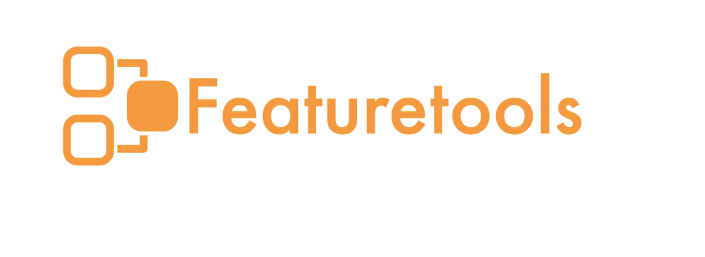

Featuretools is a framework to perform automated feature engineering. It is an open-source Python library that automatically creates many features from a set of related tables.

Featuretools is based on a method known as [“Deep Feature Synthesis”](http://featurelabs1.wpengine.com/wp-content/uploads/2017/12/DSAA_DSM_2015-1.pdf)(the name comes from stacking multiple features).
Deep feature synthesis stacks multiple transformation and aggregation operations which are called [feature primitives](https://docs.featuretools.com/automated_feature_engineering/primitives.html).

**Let's see what it does.**

**Dataset¶**

In order to demostrate featuretools we will be using an example dataset consisting of three tables:

1. **clients:** information about clients at a credit union
2. **loans:** previous loans taken out by the clients
3. **payments:** payments made/missed on the previous loans

The main issue with feature engineering is being able to take different sets of data which are often distributed across multiple tables and combine them into a single table that can be used for training a machine learning model. 

That is what *Featuretools* is good at, creating many new candidate features with minimal effort and then combining them into a single table that can then be passed on to our model.

Let's first load the **Client** data

In [ ]:

# Import the required libraries

import pandas as pd
import numpy as np

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:

#load the client dataset
clients = pd.read_csv('/content/clients.txt', parse_dates = ['joined'])
clients.head()

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


**Clients** data consist of basic information about clients at a credit union. Each client has only one row in this dataframe

Next, let's load the **Loans** data:

In [ ]:

loans = pd.read_csv('/content/loans.txt', parse_dates = ['loan_start', 'loan_end'])
loans.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


**loans** data consist of loans made to the clients. Each loan has only own row in this dataframe but clients may have multiple loans.


Lastly, let's load the **Payments** data:

In [ ]:

payments = pd.read_csv('/content/payments.txt', parse_dates = ['payment_date'])
payments.head()

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1


The **Payments** data contains the payments made on the loans. Each payment has only one row but each loan will have multiple payments.

<br>

With the given data above, let's say our task is to prepare our data to be able to build a machine learning model that will predict whether a customer will repay a loan or not.

In this scenario, the ideal way is to combine all the information about clients(loans,payments and clients) into a single table.

Since the tables are related through the *client_id* and the *loan_id* variables we can use a series of transformations and aggregations to do this process by hand.

However, ***Featuretools*** does that for us.

Before we start to use Featuretools, it's important we first understand some few concepts such as:
1. Entities and EntitySets
2. Relationships between tables
3. Feature primitives: aggregations and transformations
4. Deep feature synthesis

.

##**Entities and EntitySets**

An **entity** is simply a table, same as Pandas dataframe. The observations are in the rows and the features in the columns. 

An **EntitySet** is a collection of tables and the relationships between them. EntitySet allows us to group together multiple tables and manipulate them much quicker than individual tables.



##Installation

In [ ]:

!pip install featuretools

We can create **EntitySet** in featuretools as follows:

In [ ]:

import featuretools as ft
# Create new entityset
es = ft.EntitySet(id = 'clients')

Now we can add *entities* to this *entityset*. 

Note that each entity must have an index which is a column with unique elements. Here having unique elements means each value in the index must appear in the table **ONLY ONCE**. The clients dataframe has it's index  to be the *client_id* and each client has only one row in the dataframe.

In [ ]:


# We create an entity from the client dataframe
# Also note that the dataframe already has an index and a time (the joined column) index


es = es.entity_from_dataframe(entity_id = 'clients', dataframe = clients, 
                              index = 'client_id', time_index = 'joined')

We can also notice that the loans dataframe also has a unique index, *loan_id* and we can add to the *entityset* as we did for clients.

Also, note that *payments* dataframe has no unique index, as such, we need to pass in the parameter *make_index = True* and also specify the name of the index when we add it to the *entityset*. 

We also have the option to declare the *variable_types* when creating the *entityset* of allow featuretools to take care of that.

In [ ]:

#We create an entity from the loan dataframe
# This dataframe already has an index and a time index
es = es.entity_from_dataframe(entity_id = 'loans', dataframe = loans, 
                              variable_types = {'repaid': ft.variable_types.Categorical},
                              index = 'loan_id', 
                              time_index = 'loan_start')

In [ ]:


# We create an entity from the payments dataframe
es = es.entity_from_dataframe(entity_id = 'payments', 
                              dataframe = payments,
                              variable_types = {'missed': ft.variable_types.Categorical},
                              make_index = True,
                              index = 'payment_id',
                              time_index = 'payment_date')

Note that in this case, we specifically told featuretools to treat **missed** feature as categorical in order to be in a safer position. Although it could have figured it out.


We can inspect any of the columns:

In [ ]:

es['payments']

Entity: payments
  Variables:
    payment_id (dtype: index)
    loan_id (dtype: numeric)
    payment_amount (dtype: numeric)
    payment_date (dtype: datetime_time_index)
    missed (dtype: categorical)
  Shape:
    (Rows: 3456, Columns: 5)

All seems to be good, with the correct data types identified for ***missed***

<br>

The next step is to specify how the tables in the entityset are related.

##**Table Relationships**

We can think of *relations* in featuretools as what we know in relational database. It is a one-to-many relationship. Think of it as *parent-child relation*. 

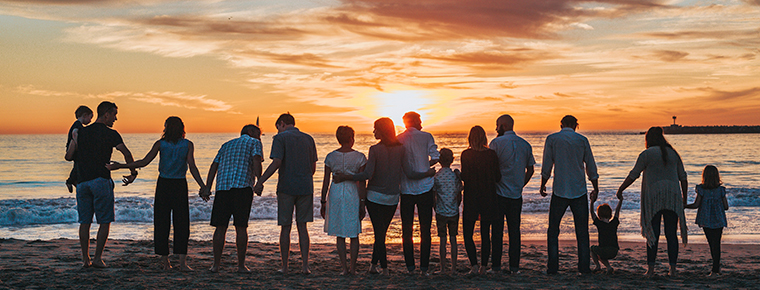


A parent is a single person or individual, but can have mutliple children. The children themselves can also have multiple children of their own. In the same way, in a parent table, each individual has a single row. Each individual in the parent table can have multiple rows in the child table as well.

For example, in our dataset, the ***clients*** dataframe is a parent of the ***loans*** dataframe. Each client has *only one* row in clients but may have *multiple rows* in loans. In the same way, ***loans*** is the parent of ***payments*** because each loan will have multiple payments.

We need to specify the variable that links two tables together in order to formalize them in feautretools.

The ***client_id*** variable links the ***clients*** and the ***loans*** table, whereas ***loan_id*** links the ***loans*** and ***payments***.

Below we will creat a relationship and add it to the *entityset*

In [ ]:

# Relationship between clients and loans
client_loan = ft.Relationship(es['clients']['client_id'],
                              es['loans']['client_id'])

# Add the relationship to the entity set
es = es.add_relationship(client_loan)

# Relationship between loans and payments
loans_payment = ft.Relationship(es['loans']['loan_id'],
                                es['payments']['loan_id'])

# Add the relationship to the entity set
es = es.add_relationship(loans_payment)

In [ ]:

es

Entityset: clients
  Entities:
    clients [Rows: 25, Columns: 4]
    loans [Rows: 443, Columns: 8]
    payments [Rows: 3456, Columns: 5]
  Relationships:
    loans.client_id -> clients.client_id
    payments.loan_id -> loans.loan_id

Now that we have all our entities in an **entityset** along with the relationships between them, we can start to make some new features from all of the tables using stacks of **feature primitives**

<br>

##**Feature Primitives**

Feature primitive refers to an operation applied to data to create a feature. These are very simple calculations that can be stacked on top of each other to create complex features. 

There are two main categories of Feature primitives:

1. **Aggregation:** function that groups together child datapoints for each parent and then calculates a statistic such as mean, min, max, or standard deviation. An example is calculating the maximum loan amount for each client. An aggregation works across multiple tables using relationships between tables.
2. **Transformation:** an operation applied to one or more columns in a single table. An example would be extracting the day from dates, or finding the difference between two columns in one table.

Sample **primitives** are listed below:

In [ ]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 80
primitives[primitives['type'] == 'aggregation'].head(20)

,name,type,dask_compatible,koalas_compatible,description
0,all,aggregation,True,False,Calculates if all values are 'True' in a list.
1,sum,aggregation,True,True,"Calculates the total addition, ignoring `NaN`."
2,last,aggregation,False,False,Determines the last value in a list.
3,std,aggregation,True,True,"Computes the dispersion relative to the mean value, ignoring `NaN`."
4,median,aggregation,False,False,Determines the middlemost number in a list of values.
5,avg_time_between,aggregation,False,False,Computes the average number of seconds between consecutive events.
6,percent_true,aggregation,True,False,Determines the percent of `True` values.
7,num_unique,aggregation,True,True,"Determines the number of distinct values, ignoring `NaN` values."
8,min,aggregation,True,True,"Calculates the smallest value, ignoring `NaN` values."
9,trend,aggregation,False,False,Calculates the trend of a variable over time.


We can take a look at specific *primitive*. For example *primitives* that transforms features.

In [ ]:

primitives[primitives['type'] == 'transform'].head(30)

,name,type,dask_compatible,koalas_compatible,description
22,add_numeric,transform,True,True,Element-wise addition of two lists.
23,cum_count,transform,False,False,Calculates the cumulative count.
24,weekday,transform,True,True,Determines the day of the week from a datetime.
25,not_equal,transform,True,False,Determines if values in one list are not equal to another list.
26,or,transform,True,True,Element-wise logical OR of two lists.
27,year,transform,True,True,Determines the year value of a datetime.
28,equal,transform,True,True,Determines if values in one list are equal to another list.
29,modulo_by_feature,transform,True,True,Return the modulo of a scalar by each element in the list.
30,week,transform,True,True,Determines the week of the year from a datetime.
31,haversine,transform,False,False,Calculates the approximate haversine distance between two LatLong


In [ ]:
# Create new features using specified primitives
features, feature_names = ft.dfs(entityset = es, target_entity = 'clients', 
                                 agg_primitives = ['mean','sum', 'max', 'percent_true', 'count','last'],
                                 trans_primitives = ["day", "year", "month", "weekday"])

In [ ]:
#@title

pd.DataFrame(features['MEAN(payments.payment_amount)'].head())

,MEAN(payments.payment_amount)
client_id,
42320,1021.483333
39384,1193.630137
26945,1109.473214
41472,1129.076190
46180,1186.550336


In [ ]:

features.head()

,income,credit_score,COUNT(loans),LAST(loans.loan_amount),LAST(loans.loan_id),LAST(loans.loan_type),LAST(loans.rate),LAST(loans.repaid),MAX(loans.loan_amount),MAX(loans.rate),MEAN(loans.loan_amount),MEAN(loans.rate),SUM(loans.loan_amount),SUM(loans.rate),COUNT(payments),LAST(payments.missed),LAST(payments.payment_amount),LAST(payments.payment_id),MAX(payments.payment_amount),MEAN(payments.payment_amount),SUM(payments.payment_amount),DAY(joined),MONTH(joined),WEEKDAY(joined),YEAR(joined),LAST(loans.COUNT(payments)),LAST(loans.DAY(loan_end)),LAST(loans.DAY(loan_start)),LAST(loans.MAX(payments.payment_amount)),LAST(loans.MEAN(payments.payment_amount)),LAST(loans.MONTH(loan_end)),LAST(loans.MONTH(loan_start)),LAST(loans.SUM(payments.payment_amount)),LAST(loans.WEEKDAY(loan_end)),LAST(loans.WEEKDAY(loan_start)),LAST(loans.YEAR(loan_end)),LAST(loans.YEAR(loan_start)),MAX(loans.COUNT(payments)),MAX(loans.LAST(payments.payment_amount)),MAX(loans.MEAN(payments.payment_amount)),MAX(loans.SUM(payments.payment_amount)),MEAN(loans.COUNT(payments)),MEAN(loans.LAST(payments.payment_amount)),MEAN(loans.MAX(payments.payment_amount)),MEAN(loans.MEAN(payments.payment_amount)),MEAN(loans.SUM(payments.payment_amount)),SUM(loans.LAST(payments.payment_amount)),SUM(loans.MAX(payments.payment_amount)),SUM(loans.MEAN(payments.payment_amount)),LAST(payments.loans.client_id),LAST(payments.loans.loan_amount),LAST(payments.loans.loan_type),LAST(payments.loans.rate),LAST(payments.loans.repaid),MAX(payments.loans.loan_amount),MAX(payments.loans.rate),MEAN(payments.loans.loan_amount),MEAN(payments.loans.rate),SUM(payments.loans.loan_amount),SUM(payments.loans.rate),DAY(LAST(loans.loan_end)),DAY(LAST(loans.loan_start)),DAY(LAST(payments.payment_date)),MONTH(LAST(loans.loan_end)),MONTH(LAST(loans.loan_start)),MONTH(LAST(payments.payment_date)),WEEKDAY(LAST(loans.loan_end)),WEEKDAY(LAST(loans.loan_start)),WEEKDAY(LAST(payments.payment_date)),YEAR(LAST(loans.loan_end)),YEAR(LAST(loans.loan_start)),YEAR(LAST(payments.payment_date))
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42320,229481,563,15,8090,10156,home,3.18,0,13887,6.74,7062.066667,2.457333,105931,36.86,120,1,1082,1542,2769,1021.483333,122578,27,4,3,2000,6,17,22,1484,1192.333333,4,9,7154,4,5,2015,2012,14,2098,2229.400000,18518,8.000000,1001.733333,1325.066667,1042.907672,8171.866667,15026,19876,15643.615079,42320,8090,home,3.18,0,13887,6.74,7028.058333,2.523667,843367,302.84,17,22,12,4,9,4,4,5,4,2015,2012,2013
39384,191204,617,19,14654,11735,other,2.26,0,14654,9.23,7865.473684,3.538421,149444,67.23,146,1,2045,2562,2822,1193.630137,174270,18,6,6,2000,7,13,21,2822,2311.285714,3,7,16179,6,0,2016,2014,17,2472,2311.285714,24087,7.684211,1265.000000,1503.473684,1194.628227,9172.105263,24035,28566,22697.936321,39384,14654,other,2.26,0,14654,9.23,7957.130137,3.418630,1161741,499.12,13,21,13,3,7,3,6,0,4,2016,2014,2015
26945,214516,806,15,9249,11482,cash,2.86,1,14593,5.65,7125.933333,2.855333,106889,42.83,112,1,1597,3340,2768,1109.473214,124261,26,11,6,2000,6,11,24,1834,1598.666667,5,12,9592,2,1,2016,2013,13,2530,2272.857143,20181,7.466667,1237.400000,1411.600000,1115.150112,8284.066667,18561,21174,16727.251679,26945,9249,cash,2.86,1,14593,5.65,6884.401786,2.947589,771053,330.13,11,24,30,5,12,7,2,1,2,2016,2013,2014
41472,152214,638,16,10122,11936,cash,1.03,0,13657,9.82,7510.812500,3.981250,120173,63.70,105,0,1453,3129,2436,1129.076190,118553,6,11,1,2001,5,22,6,1803,1427.000000,6,8,7135,2,2,2016,2014,9,2230,1992.250000,15938,6.562500,1076.937500,1382.687500,1133.414162,7409.562500,17231,22123,18134.626587,41472,10122,cash,1.03,0,13657,9.82,7473.628571,4.146286,784731,435.36,22,6,21,6,8,3,2,2,5,2016,2014,2015
46180,43851,562,20,3834,10887,other,1.38,0,14081,9.26,7700.850000,3.502500,154017,70.05,149,1,697,437,2660,1186.550336,176796,6,11,1,2001,8,24,3,706,557.125000,2,5,4457,2,5,2016,2014,16,2273,2016.750000,16134,7.450000,1176.400000,1491.450000,1163.803383,8839.800000,23528,2982

Featuretool has created new features by combining and stacking the primitives.

<br>

##**Deep Feature Synthesis**

Deep Feature Synthesis (DFS) is the process of stacking feature primitives to form features with a "depth" equal to the number of primitives. 

For instance the LAST(loans.(MEAN(payments.payment_amount))) has depth = 2 because it is made by stacking two feature primitives, first an aggregation and then a transformation. This feature represents the average payment amount for the last (most recent) loan for each client.

In [ ]:


pd.DataFrame(features['LAST(loans.MEAN(payments.payment_amount))'].head(10))

,LAST(loans.MEAN(payments.payment_amount))
client_id,
42320,1192.333333
39384,2311.285714
26945,1598.666667
41472,1427.000000
46180,557.125000
46109,1708.875000
32885,1729.000000
29841,1125.500000
38537,1348.833333


##**Automated Deep Feature Synthesis**

Featuretools can automatically generate many new features for us without us specifying the *primitives*.

The only thing we do is to specify the *max_depth* parameter and allow featuretools to automatically try many combinations of feature primitives.

In [ ]:


# we are not specifying any primitives here
features, feature_names = ft.dfs(entityset=es, target_entity='clients', 
                                 max_depth = 4)

In [ ]:


features.head()

,income,credit_score,COUNT(loans),MAX(loans.loan_amount),MAX(loans.rate),MEAN(loans.loan_amount),MEAN(loans.rate),MIN(loans.loan_amount),MIN(loans.rate),MODE(loans.loan_type),MODE(loans.repaid),NUM_UNIQUE(loans.loan_type),NUM_UNIQUE(loans.repaid),SKEW(loans.loan_amount),SKEW(loans.rate),STD(loans.loan_amount),STD(loans.rate),SUM(loans.loan_amount),SUM(loans.rate),COUNT(payments),MAX(payments.payment_amount),MEAN(payments.payment_amount),MIN(payments.payment_amount),MODE(payments.missed),NUM_UNIQUE(payments.missed),SKEW(payments.payment_amount),STD(payments.payment_amount),SUM(payments.payment_amount),DAY(joined),MONTH(joined),WEEKDAY(joined),YEAR(joined),MAX(loans.COUNT(payments)),MAX(loans.MEAN(payments.payment_amount)),MAX(loans.MIN(payments.payment_amount)),MAX(loans.NUM_UNIQUE(payments.missed)),MAX(loans.SKEW(payments.payment_amount)),MAX(loans.STD(payments.payment_amount)),MAX(loans.SUM(payments.payment_amount)),MEAN(loans.COUNT(payments)),...,NUM_UNIQUE(loans.YEAR(loan_end)),NUM_UNIQUE(loans.YEAR(loan_start)),SKEW(loans.COUNT(payments)),SKEW(loans.MAX(payments.payment_amount)),SKEW(loans.MEAN(payments.payment_amount)),SKEW(loans.MIN(payments.payment_amount)),SKEW(loans.NUM_UNIQUE(payments.missed)),SKEW(loans.STD(payments.payment_amount)),SKEW(loans.SUM(payments.payment_amount)),STD(loans.COUNT(payments)),STD(loans.MAX(payments.payment_amount)),STD(loans.MEAN(payments.payment_amount)),STD(loans.MIN(payments.payment_amount)),STD(loans.NUM_UNIQUE(payments.missed)),STD(loans.SKEW(payments.payment_amount)),STD(loans.SUM(payments.payment_amount)),SUM(loans.MAX(payments.payment_amount)),SUM(loans.MEAN(payments.payment_amount)),SUM(loans.MIN(payments.payment_amount)),SUM(loans.NUM_UNIQUE(payments.missed)),SUM(loans.SKEW(payments.payment_amount)),SUM(loans.STD(payments.payment_amount)),MAX(payments.loans.loan_amount),MAX(payments.loans.rate),MEAN(payments.loans.loan_amount),MEAN(payments.loans.rate),MIN(payments.loans.loan_amount),MIN(payments.loans.rate),MODE(payments.loans.client_id),MODE(payments.loans.loan_type),MODE(payments.loans.repaid),NUM_UNIQUE(payments.loans.client_id),NUM_UNIQUE(payments.loans.loan_type),NUM_UNIQUE(payments.loans.repaid),SKEW(payments.loans.loan_amount),SKEW(payments.loans.rate),STD(payments.loans.loan_amount),STD(payments.loans.rate),SUM(payments.loans.loan_amount),SUM(payments.loans.rate)
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42320,229481,563,15,13887,6.74,7062.066667,2.457333,1070,0.38,home,1,4,2,0.185406,0.993713,4165.826885,1.984938,105931,36.86,120,2769,1021.483333,130,1,2,0.613867,640.794189,122578,27,4,3,2000,14,2229.400000,1629,2,1.497213,454.045482,18518,8.000000,...,9,11,1.105748,0.377665,0.476753,0.484028,0.000000,0.553120,0.375939,2.236068,797.819749,650.747523,503.655844,0.000000,0.584135,5181.930099,19876,15643.615079,11789,30,2.920182,2980.291296,13887,6.74,7028.058333,2.523667,1070,0.38,42320,home,1,1,4,2,0.097213,0.872916,3929.351652,1.891948,843367,302.84
39384,191204,617,19,14654,9.23,7865.473684,3.538421,1770,0.43,credit,1,4,2,-0.242626,0.992152,3964.286840,2.629599,149444,67.23,146,2822,1193.630137,195,1,2,0.234089,630.722531,174270,18,6,6,2000,17,2311.285714,1771,2,1.145798,445.129088,24087,7.684211,...,10,9,1.921806,-0.255680,0.013649,0.136878,-4.358899,-0.274291,0.799637,2.944913,753.487843,626.473005,464.286978,0.229416,0.749189,5784.173752,28566,22697.936321,16629,37,0.435942,4347.916153,14654,9.23,7957.130137,3.418630,1770,0.43,39384,cash,1,1,4,2,-0.277360,0.971757,3765.368569,2.685701,1161741,499.12
26945,214516,806,15,14593,5.65,7125.933333,2.855333,653,0.13,credit,0,4,2,0.174492,-0.002227,4543.621769,1.619717,106889,42.83,112,2768,1109.473214,69,1,2,0.421394,769.466481,124261,26,11,6,2000,13,2272.857143,1637,2,1.585838,677.885381,20181,7.466667,...,8,10,1.048653,0.088177,0.105803,0.203092,0.000000,1.369917,0.778781,2.166850,908.800528,726.845117,548.991265,0.000000,0.732971,6266.354402,21174,16727.251679,12313,30,0.583

In [ ]:

features.shape

(25, 110)

We can see that **featuretools** has created over 100 new features without us doing this work manually. 

We should also note that although this process is awesome, it alo results in *curse of dimensionality*, which needs to be dealt with before building any [machine learning model](https://www.udemy.com/course/data-science-and-machine-learning-projects-mastery/?referralCode=AF7865ACCACC24F02082) on the dataset.

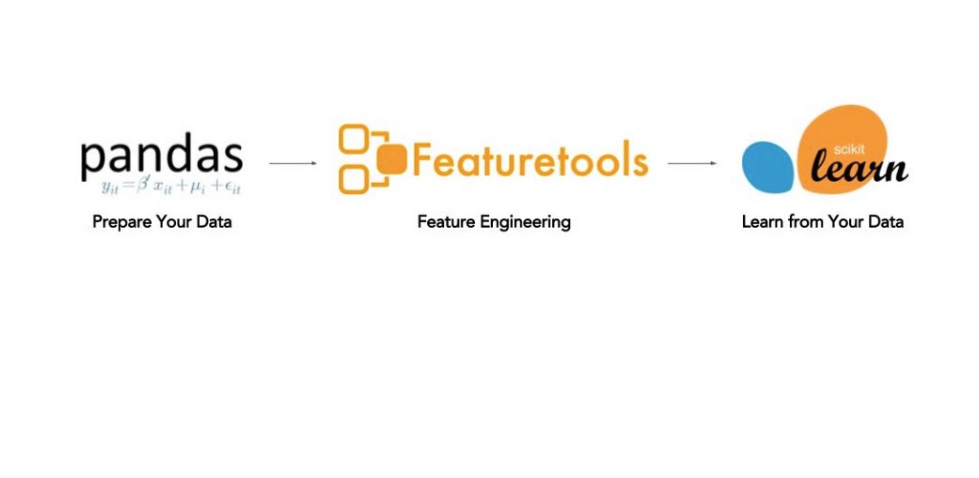

.

#**PART 3: RFECV**#

In [ ]:

titanic=pd.read_csv('/content/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**Quick data preparation**

In [ ]:

#drop some unnecessary features
titanic.drop(['Ticket', 'PassengerId','Name'], axis=1, inplace=True)

#map the male feature with 0 and the femaale feature with 1
gender_mapper = {'male': 0, 'female': 1}
titanic['Sex'].replace(gender_mapper, inplace=True)

#map the Missing values with zero(0) else 1
titanic['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in titanic['Cabin']]
titanic.drop('Cabin', axis=1, inplace=True)

#fill the missing values in the Age feature
titanic['Age'] = titanic['Age'].fillna(int(titanic['Age'].mean()))

#map the categories in the Embark column
emb_dummies = pd.get_dummies(titanic['Embarked'], drop_first=True, prefix='Embarked')
titanic = pd.concat([titanic, emb_dummies], axis=1)
titanic.drop('Embarked', axis=1, inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


We can even scale these feature to have the same scale since Age and Fare are having higher scale and will end up dominating other features if we are using distance based models such as SVM. You can learn about [Feature Scaling here](https://colab.research.google.com/drive/1AWf_4eREHMHSTKCi3EbS_7zQB8ItOQnN?usp=sharing)

You can check to see if the variables are having high correlations.

In [ ]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Known,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,-0.067814,-0.035322,0.081629,0.257307,0.316912,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.131900,-0.334974,0.083081,0.018443,-0.549500,-0.725541,0.221009,0.081720
Sex,0.543351,-0.131900,1.000000,-0.082949,0.114631,0.245489,0.182333,0.140391,0.074115,-0.125722
Age,-0.067814,-0.334974,-0.082949,1.000000,-0.232978,-0.176486,0.093706,0.236162,-0.021093,-0.021999
SibSp,-0.035322,0.083081,0.114631,-0.232978,1.000000,0.414838,0.159651,-0.040460,-0.026354,0.070941
Parch,0.081629,0.018443,0.245489,-0.176486,0.414838,1.000000,0.216225,0.036987,-0.081228,0.063036
Fare,0.257307,-0.549500,0.182333,0.093706,0.159651,0.216225,1.000000,0.482075,-0.117216,-0.166603
Cabin_Known,0.316912,-0.725541,0.140391,0.236162,-0.040460,0.036987,0.482075,1.000000,-0.129572,-0.110087
Embarked_Q,0.003650,0.221009,0.074115,-0.021093,-0.026354,-0.081228,-0.117216,-0.129572,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.125722,-0.021999,0.070941,0.063036,-0.166603,-0.110087,-0.496624,1.000000


We can see that there is less correlation among the features.

##**Running RFECV**

**Recursive Feature Elimination(RFE)** is a popular feature selection algorithm.

RFE is popular partly because it is easy to configure and use and also it's effective at selecting those features in a training dataset that are more or most relevant in predicting the target variable.

It comes with the following parameters:

1. ***estimator*** — your model instance
2. ***step*** — number of features to remove at each iteration
3. ***cv*** — for Cross-Validation. 
4. ***scoring*** — scoring metric, what you want to optimize for. 

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

X = titanic.drop('Survived', axis=1)
target =titanic['Survived']

rfc = RandomForestClassifier(random_state=1)
rfecv = RFECV(estimator=rfc, step=1, cv=10, scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=10,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=1,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

##**Optimal Number of Features**

<br>

Let's see the Optimal number of features that can help us to achieve the best model.

In [ ]:

print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


Let's see the accuracies obtained with these optimal number of features

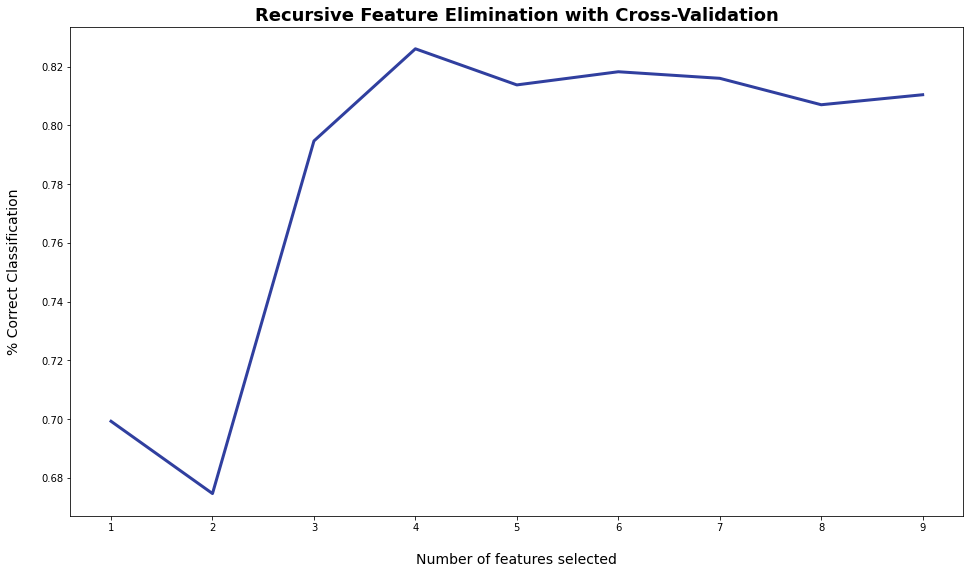

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold')
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
len(rfecv.grid_scores_)

9

We can see that after 4 features, the model performance did not improve anymore. That's why we got the optimal features to be 4.

In [ ]:
rfecv.support_

array([ True,  True,  True, False, False,  True, False, False, False])

In [ ]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Known',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[3 4 6 7 8]


##**Feature Importance**

In [ ]:

rfecv.estimator_.feature_importances_

array([0.1004329 , 0.29189803, 0.27521791, 0.33245115])

Since this does not give much information, let's visualise it for better clarity.

In [ ]:
#@title
# import numpy as np

# dset = pd.DataFrame()
# dset['attr'] = X.columns[np.where(rfecv.support_ == True)[0]]
# dset['importance'] = rfecv.estimator_.feature_importances_

In [ ]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [ ]:
dframe 

,attr,importance
0,Pclass,0.100433
2,Age,0.275218
1,Sex,0.291898
3,Fare,0.332451


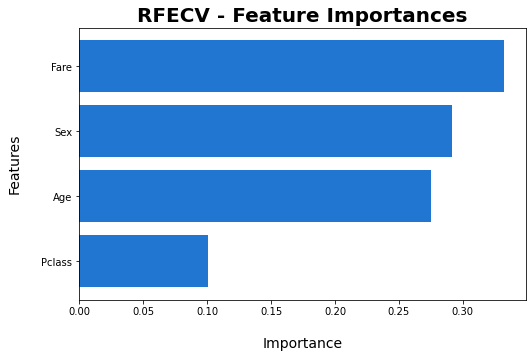

In [ ]:
# import numpy as np

dframe = pd.DataFrame()
dframe['attr'] = X.columns
dframe['importance'] = rfecv.estimator_.feature_importances_

dframe.sort_values(by='importance',ascending=True,inplace=True)


plt.figure(figsize=(8, 5))
plt.barh(y=dframe['attr'], width=dframe['importance'], color='#2076D1')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold')
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.ylabel('Features', fontsize=14, labelpad=20)
plt.show()

Now you can use these features to build the model instead of adding all of the features that do not contribute to our model performance. By doing so, we will be able to reduce our training time and also achieve a more robhust model.

#**PART 4**

##**AutoFeat**

AutoFeat is a python library that provides automated feature engineering and feature selection along with models such as AutoFeatRegressor and AutoFeatClassifier.

The autofeat library provides the **‘AutoFeatRegressor’** and the **‘AutoFeatClassifier’** models, which automatically generate and select non-linear input features given the original data and then train a linear prediction model with these features. 
Autofeat can be used for both feature transformation and feature extraction.

## Installation

In [ ]:

!pip install autofeat

##**AutoFeat:** FeatureSelector


In [ ]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:

from autofeat import AutoFeatRegressor
from sklearn.datasets import load_wine
X,y = load_wine(True)


cl = AutoFeatRegressor()
new_X_feature =cl.fit_transform(pd.DataFrame(X), pd.DataFrame(y))

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 8 features after 5 feature selection runs
[featsel] 8 features after correlation filtering
[featsel] 7 features after noise filtering


In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
new_X_feature

,0,3,6,9,10,11,12
0,14.23,15.6,3.06,5.64,1.04,3.92,1065.0
1,13.20,11.2,2.76,4.38,1.05,3.40,1050.0
2,13.16,18.6,3.24,5.68,1.03,3.17,1185.0
3,14.37,16.8,3.49,7.80,0.86,3.45,1480.0
4,13.24,21.0,2.69,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...
173,13.71,20.5,0.61,7.70,0.64,1.74,740.0
174,13.40,23.0,0.75,7.30,0.70,1.56,750.0
175,13.27,20.0,0.69,10.20,0.59,1.56,835.0
176,13.17,20.0,0.68,9.30,0.60,1.62,840.0


**Further reading:** *AutoFeatModel*, *AutoFeatRegressor*, *AutoFeatClassifier*